# Applied Machine Learning, Module 1: A simple classification task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fruits=pd.read_table('assets/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


O arquivo contém massa, peso e comprimento de laranjas,limões e maçãs.   

Podemos criar um mapa enumerado para melhor entendimento da variável nome

In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Examinando os dados

### Plotting a scatter matrix

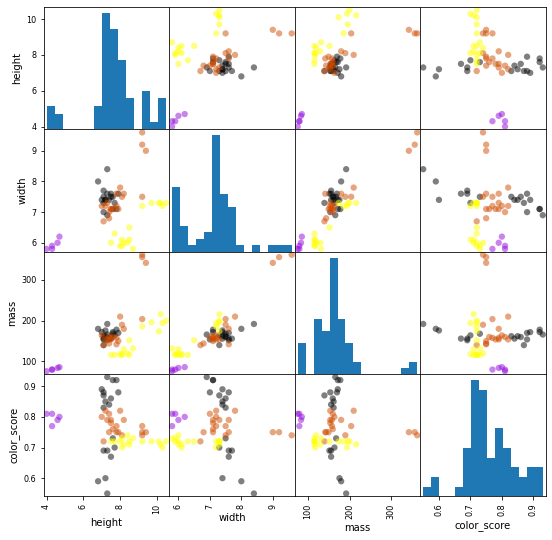

In [4]:
# from matplotlib import colormaps as cm
import matplotlib.cm


X=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']

# Plotting
# cmap=cm.get_cmap('gnuplot')
cmap = matplotlib.cm.get_cmap('gnuplot')
scatter=pd.plotting.scatter_matrix(X,c=y,marker='o', s=40,hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)

### Plotting a 3D scatter plot

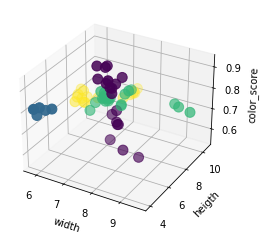

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X['width'],X['height'],X['color_score'],c=y,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('heigth')
ax.set_zlabel('color_score')
plt.show()

### Create train-test-split

Para esse exemplo, vamos usar a massa, comprimento e peso como features

In [6]:
# Nesse exemplo, vamos usar massa, comprimento e altura de cada fruta
X = fruits[['mass','width','height']]
y=fruits['fruit_label']

# default é 75% / 25% traint-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


### Create classifier object

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

### Traint the classifier using the training data

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [9]:
knn.score(X_test,y_test)

0.5333333333333333

## Uso do modelo K-nn para classificar novos objetos

In [10]:
# Uma pequena fruta com massa 20g, comprimento 4.3cm e altura 5.5cm
fruit_prediction = knn.predict([[40,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

/home/joao/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [11]:
# Segundo exemplo: Uma fruta grande com massa 100g, width 6.3cm e altura 8.5cm
fruit_prediction = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

/home/joao/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

## Plot do modelo

In [12]:
X_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


In [ ]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,5,'uniform')

### Quão sensível é a acurácia de KNN de acordo com a escolha do parâmetro k?

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### Quão sensível é a acurácia de KNN de acordo com a escolha da divisão dos parametros de teste?

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5);

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s);
        knn.fit(X_train, y_train);
        scores.append(knn.score(X_test, y_test));
    plt.plot(s, np.mean(scores), 'bo');

plt.xlabel('Training set proportion (%)');
plt.ylabel('accuracy');